# Patrick Valadka Capstone Technical Writeup


√ 1) How you acquired your data (including any sampling that you did)
2) How the data should be transformed, including justifying your choices
3) How you operationalized your outcome variable, including your justification
4) Your choice of model and any hyperparameters, including what metric or metrics you use to determine a successful model
√ 5) Any future deployment strategies, additions of data, or modeling techniques you have yet to try


# The Motivation:

The topic I chose to explore for my Capstone project is crime in Austin.
I was very interested in the prospect of locating potential crimes as I have anecdotally heard that Austin's crime is highly concentrated on certain neighborhoods and a few select types of crime. Additionally, my vehicle was broken into during the course and I was interested in the possibility of helping the Austin Police Department design their strategic partrolling in order to reduce the frequency of these crimes.

I will model my report as based on the Data Science Process as illustrated below:

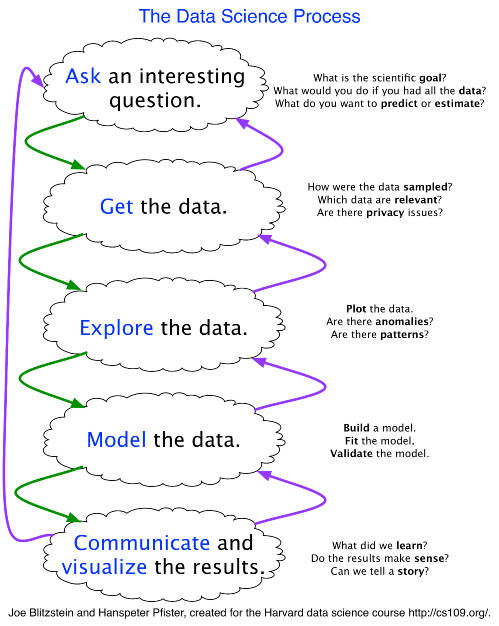

# The Data

In looking for data to answer my question, I began with a web search for established sources of accessible crime data for the Austin metro region. I found potentially viable datasets via spotcrime, Trulia, and the City of Austin public data portal. 

The City of Austin has done an excellent job at making some of their datasets available for public use, and this represented the most comprehensive aggregation of crime data for the city.

I had the option of selecting between a few different crime and safety datasets, each with unique time frames and other factors, but ultimately chose the 2016 Annual Crime Dataset as it was timely, (nearly) completely updated, and represented the most comprehensive survey of crime in the Austin area.
-------- 
# FINISH


### Data Dictionary:
There are 37,461 rows in the dataset as well as 13 columns initially.

The columns found in the dataset, a brief description, and their type include:

GO Primary Key: A numerical column that serves as a unique identifier for each instance.

	
Council District: Numerical column designating the council district the crime occured in.
	

GO Highest Offense Desc: A string that specifically describes the highest crime committed in the instance into a broad range of 54 distinct crimes.
	

Highest NIBRS/UCR Offense Description: An aggregation of the 'GO Highest Offense Desc' column into seven narrowly-defined categories. {Theft, Burglary, Agg Assault, Auto Theft, Robbery, Rape, Murder}            	

	
GO Report Date: An date value describing when the crime occured, curiously in the form DD-MMM-YY (i.e. 31-Dec-16), which needed to be converted 
	

GO Location: String value that describes either the specific crime address or a block-based location. 	

	
Clearance Status: Either 'C' (Clear) or 'N' binary string value representing the current status of the crime report.	
	

	
Clearance Date: Refers to the date in which the crime status was transferred to 'C', represented by a null value if the crime has not been clear.
	
	
GO District: I believe that this is related to the specific police patrol district in which the crime occured. Represented by an alphabetical column 'A' through 'I' as well as an 'AP' value and an '88' (removed as less than .01% of results)	
	
	
GO Location Zip: The Zip Code in which the crime occured, initialy represented as a float. 	
		
    
GO Census Tract: The census tract in which the crime occured, typically aligned with the concept of a neighborhood and represented by a numerical float value in the dataset. 
	
	
GO X Coordinate: Specific X-Coordinate of crime location (or best estimation) as a float.	
	

	
GO Y Coordinate: Specific Y-Coordinate of crime location (or best estimation) as a float.



# Data Exploration

I performed inital data exploration to investigate the distribution of crime throughout the city as well as the types of crimes that were most prevalent in the region.

In this plot, I depict the count of distinct crimes reported in each zip code.

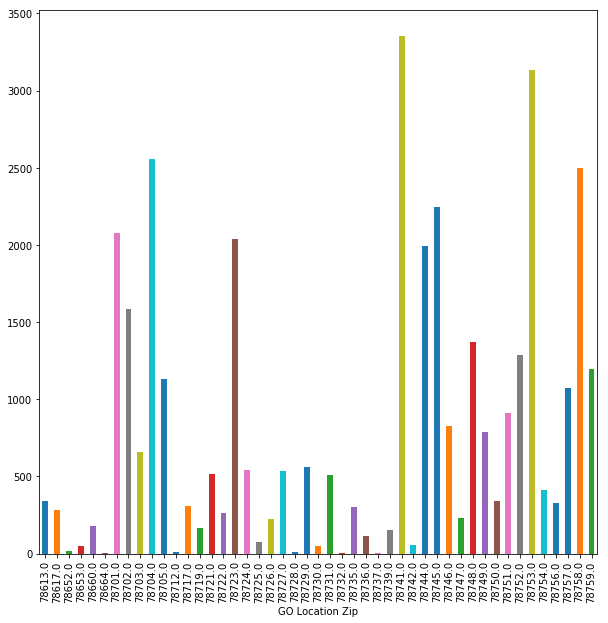

This plot depicts every specified instance of highest offense committed during the commission of the crime in the dataset- the 'GO Highest Offense Desc' column 

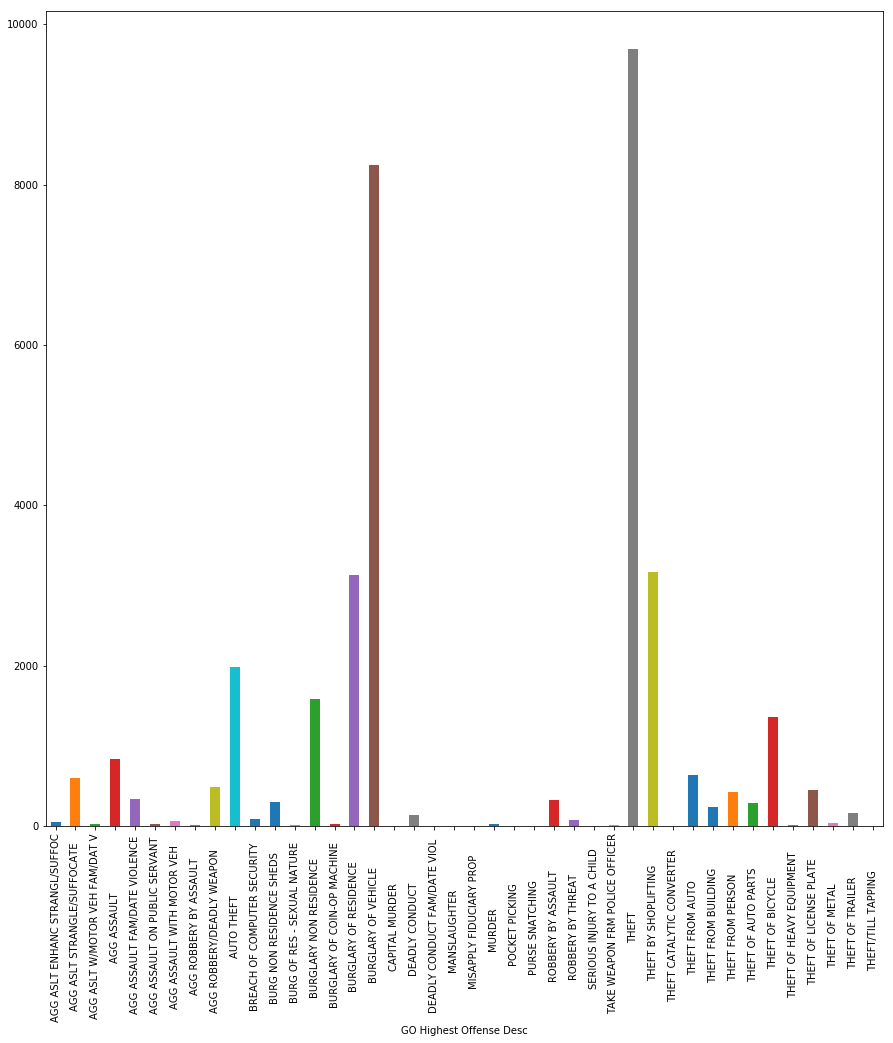

I was also curious as to the distribution of crime types in the 'Highest NIBRS/UCR Offense Description'

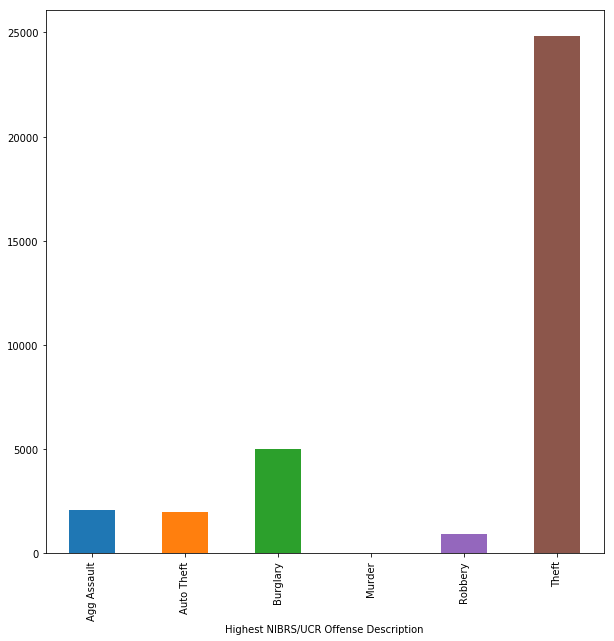

In terms of the council districts represented, there was a fair amount of variability in terms of the frequency in which crimes would occur in each district. 
(This plot depicts the districts after null values and obscure/incorrect districts were removed}

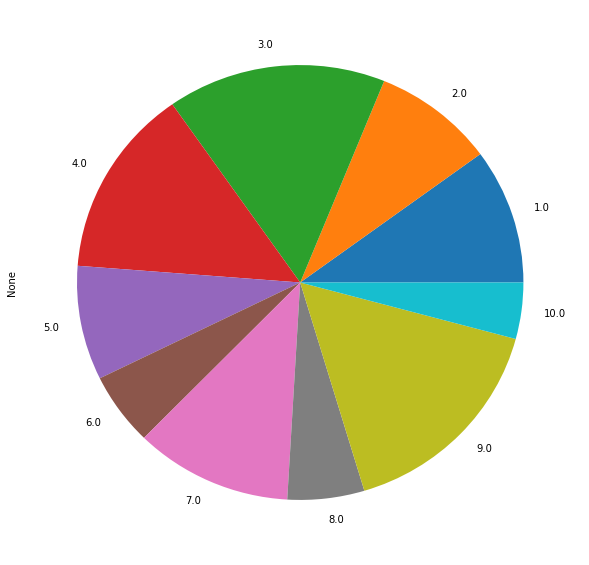

I was very interested to explore the crime variation (if any) in the days and months of 2016.

There seemed to be a slight variation in terms of crime by month, but it did not validate my initial assumption that more crime would occur in the warmer months and summer (as is anecdotally believed).

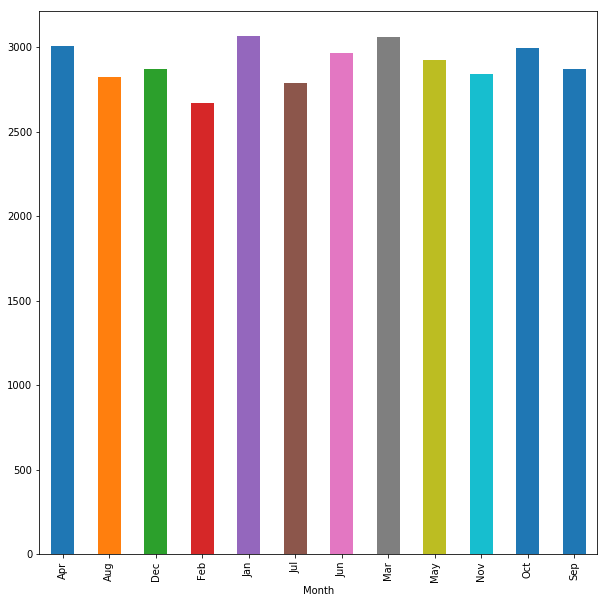

In terms of the amount of crime based on the day of the week, my initial assumption was that more crimes would occur during the weekend. This was, in actuality, not the case as the day with the most crimes reported was Monday. I was very skeptical of this result and verified with the Austin Police Department that crime reports over the weekend were not aggregated onto Monday's total, essentially obsuring the true crime date. They claimed that some cases were reported at the end of the shift, but they should be listed on the correct date.

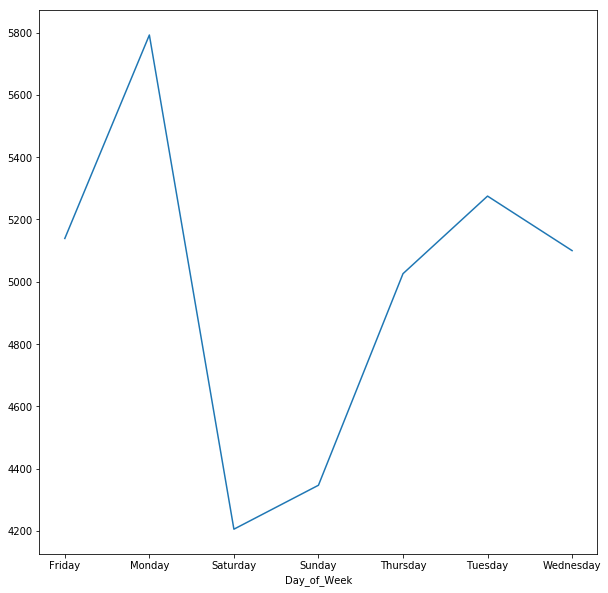

This plot was created after transforming the initial 'GO Report Date' to a datetime object and splitting the month, date, and year column to individual columns. I subsequently transformed the date column into a Monday through Sunday based on the GO Report Day date (as show below)

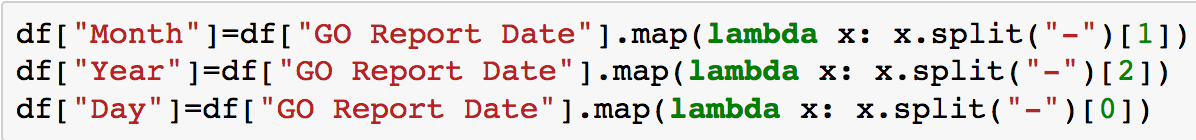

Before engaging in further cleaning of the data, I also plotted the relative location of the each crime using the X and Y coordinate data as well as the Zip Code in Tableau

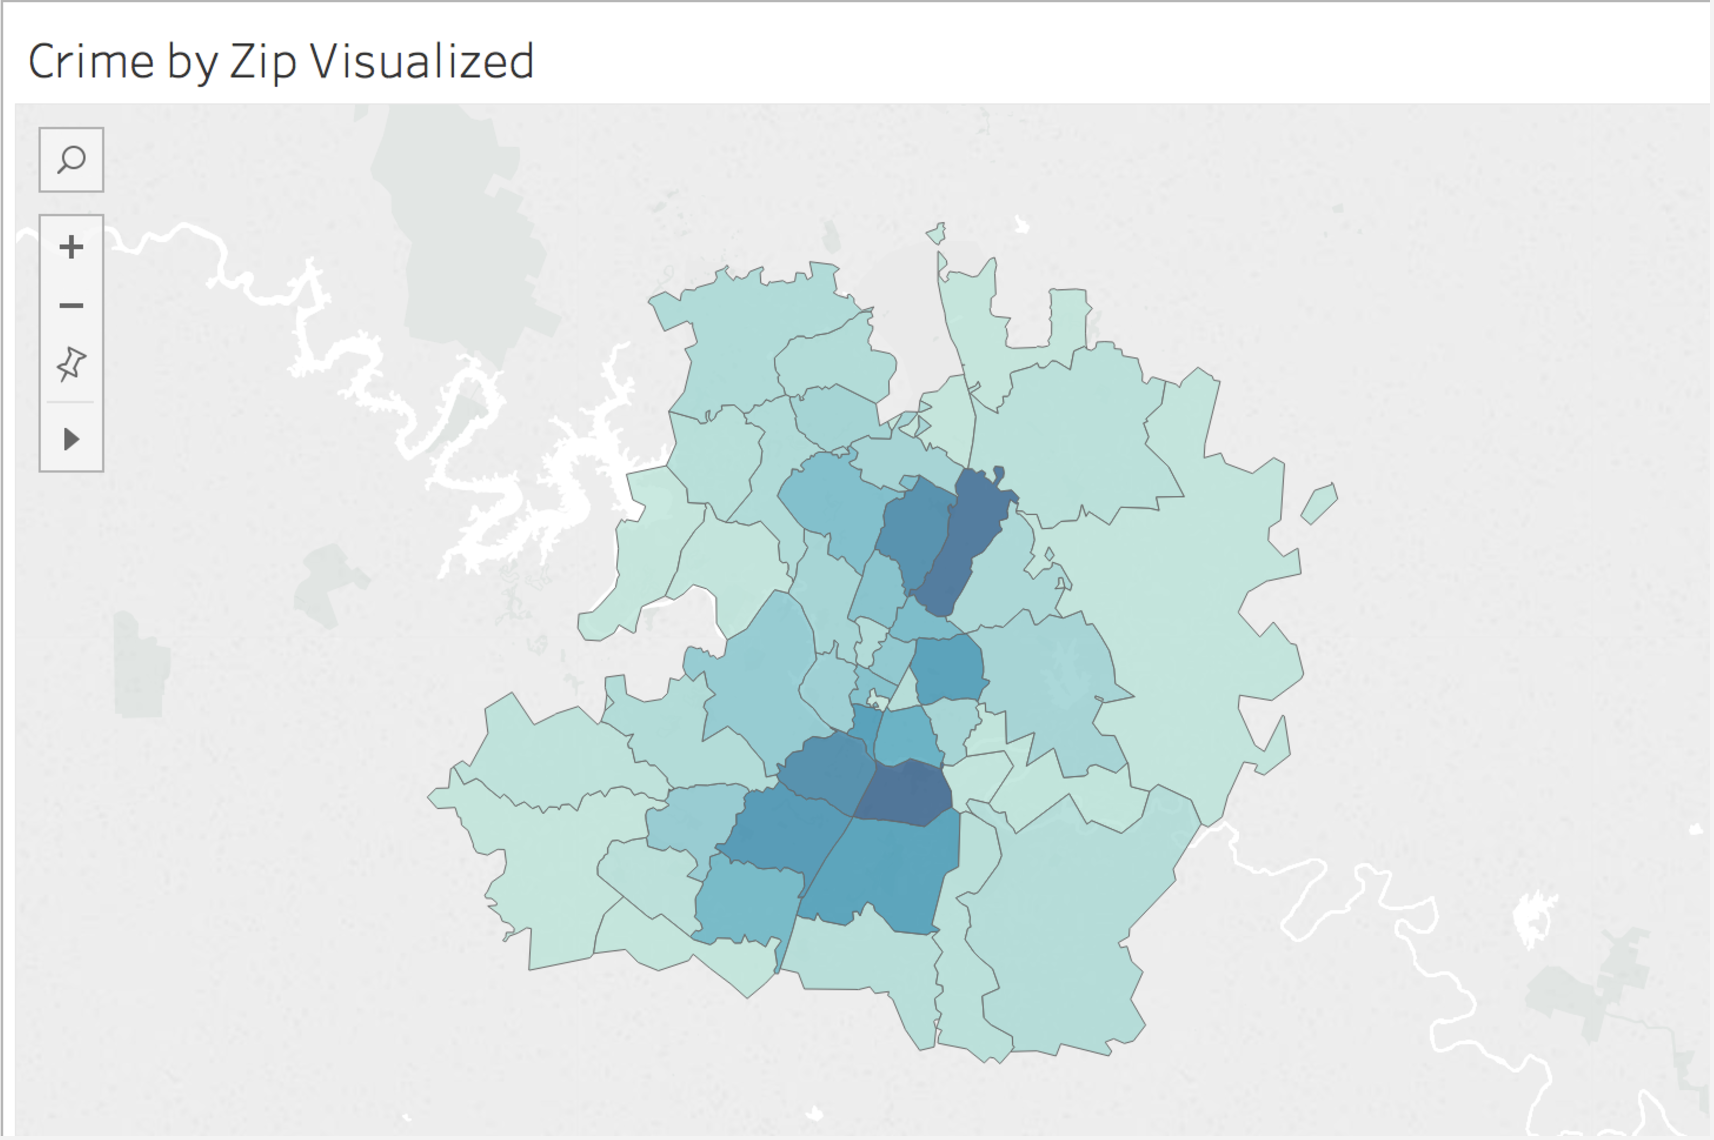

# Data Cleaning

Steps for cleaning the data:
1) Transforming the GO Location Zip and Council District columns from float to int


    

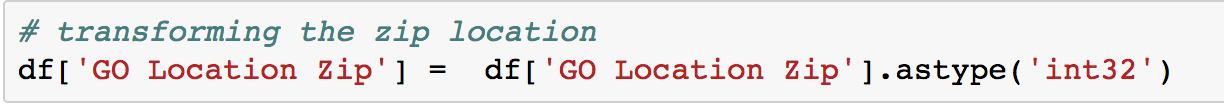

2) Inspecting count of null/NA values and dropping rows with NA values 

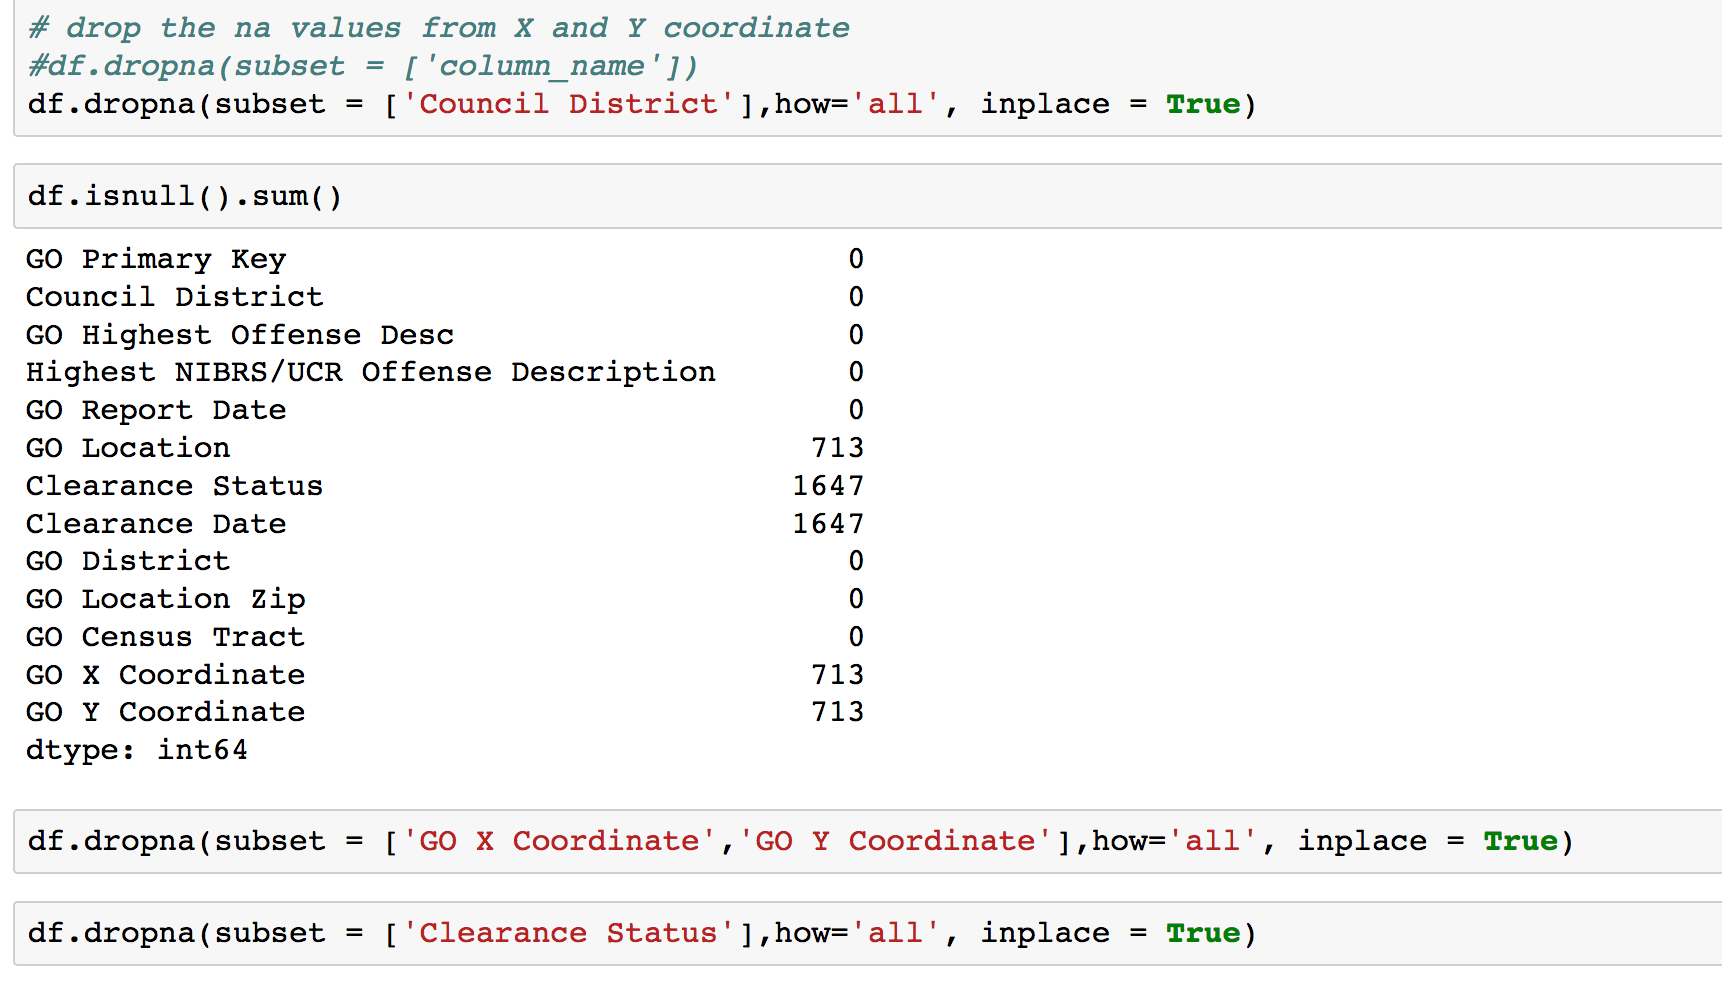

3) As I previously mentioned, I had to convert the 'GO Report Date' into a datetime object before splitting (as shown above) in order to calculate the unique totals for each month and day

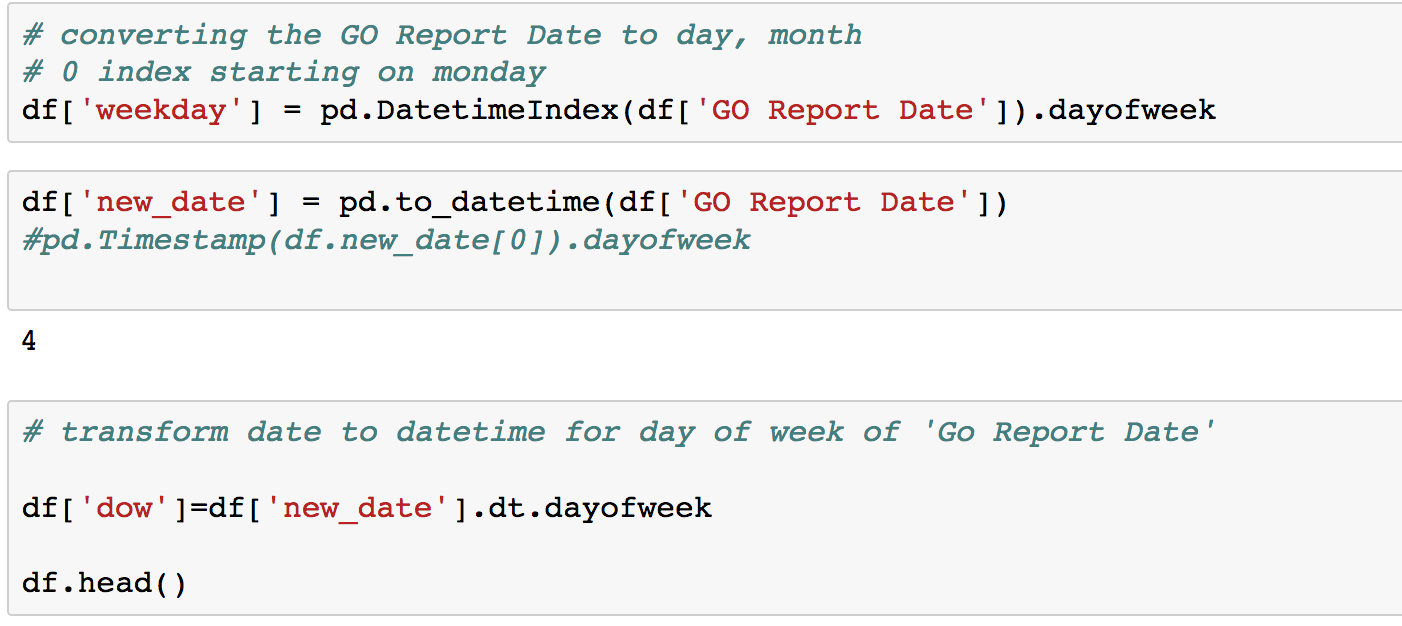

The final transformation I perfomed changed the numerical day of week value to a string

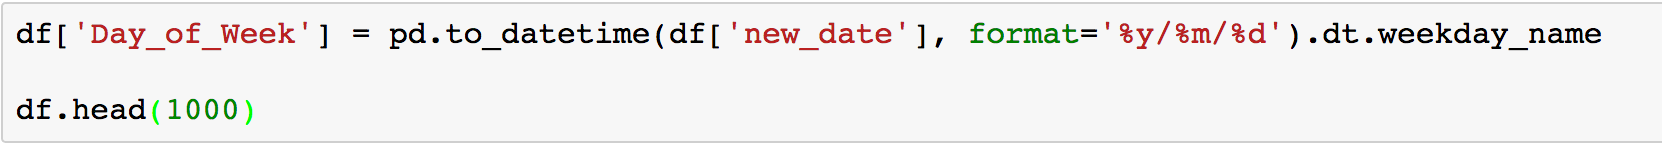

# Data Modeling

As I started my modeling, I was interested in exploring the viability of the initial columns from the dataset, as well as dummified columns for each major type of crime, in terms of predicting the location zip

I also performed a train, test, split on the dataset as well as scaled the data.

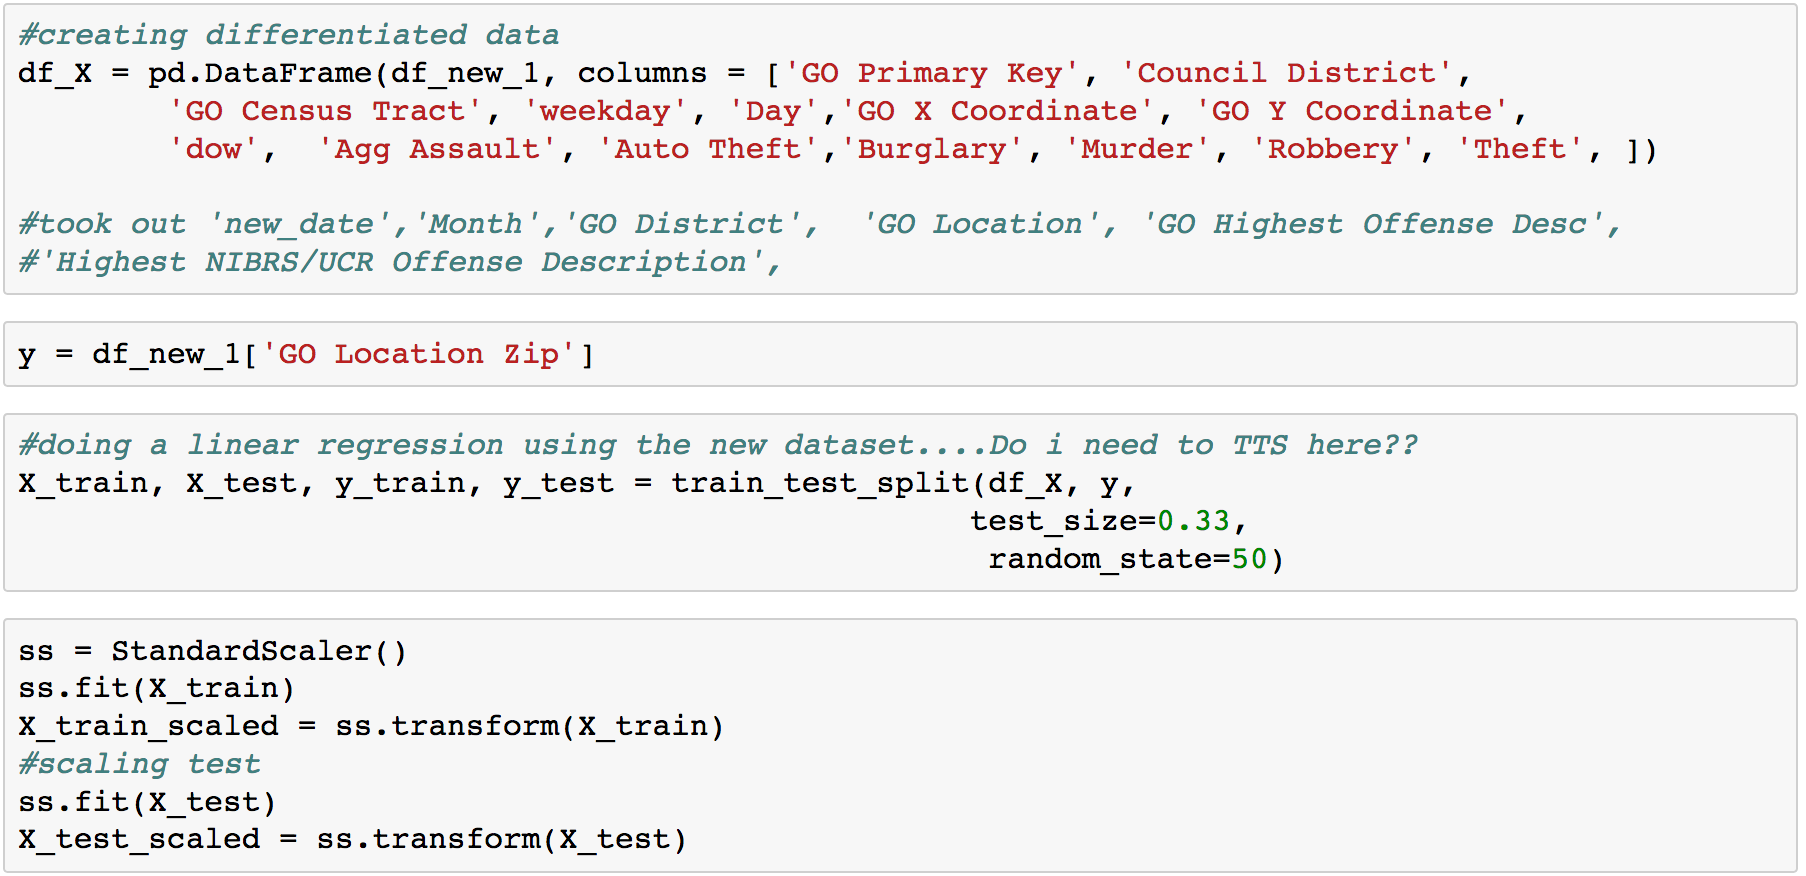

I attempted a few different models based on this strategy, including: logistic regression, decision tree classifier, random forest, k-nearnest neighbors, support vector classifier, passive aggresive classifier, GradientBoostingClassifer,
and adaboostclassifer.

I will present some interesting results below.

One of the first models I tried was Logistic Regression. I was initially surprised the relatively high recall score, which is defined as the ability of the classifier to find all the positive samples from my test set.


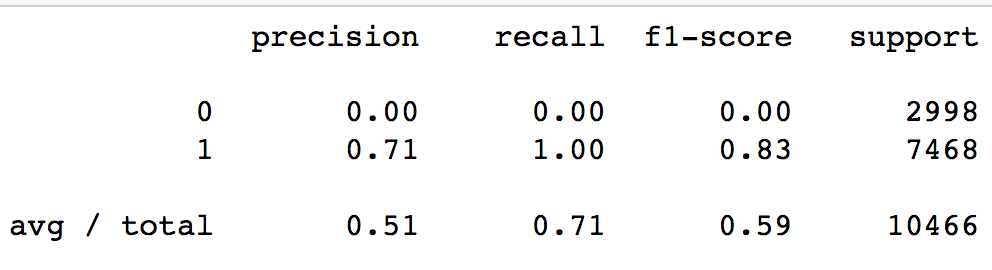

To showcase some of the better models, the KNN performed suprisingly well considering the limited amount of tuning I performed

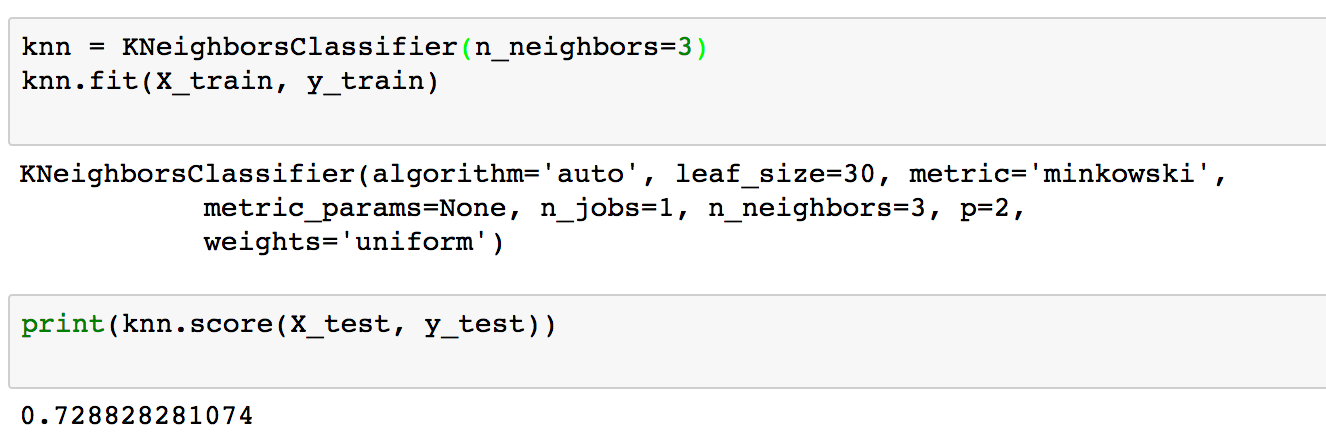

The best performing model I had was the AdaBoostClassifier. I tuned a few parameters for the model, including the number of estimators, the max depth of the estimators, as well as the max number of features. Using this model, I was able to achieve a 0.842525840354 score for my test set, which represents approximately a 10 to 15% improvement compared to my other models.

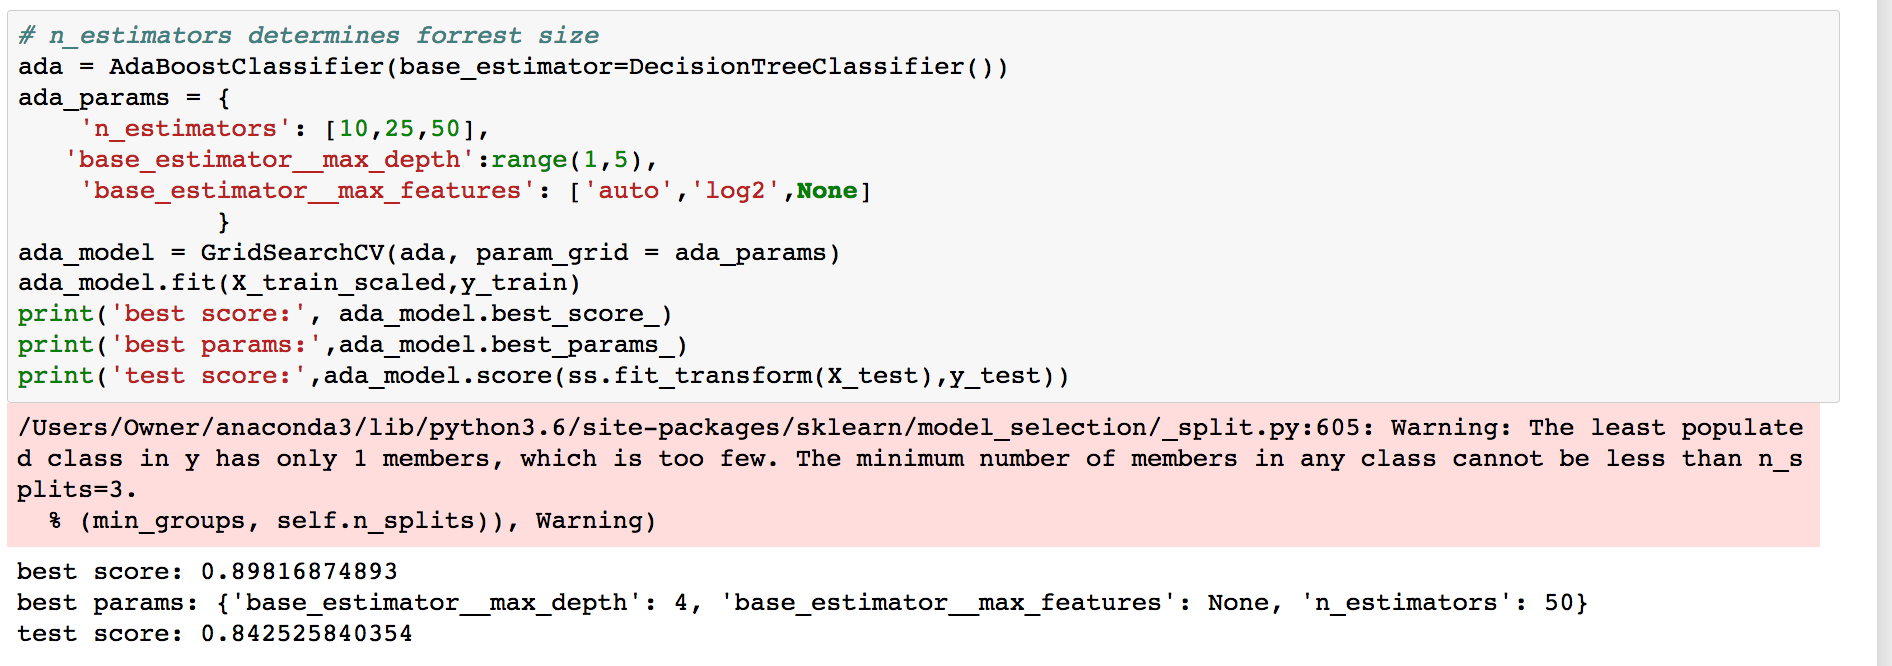

For these models, the baseline accuracy is around ~9%, so I consider them as a dramatic improvement compared the baseline and reasonably predictive. 

### A secondary value I was interested in predicting is the type of crime that may occur based on location factors as well as certain time periods

In this prediction I dramatically reduced the number of features that could impact the model and used the type of crime as the target. Models I utilized include: logistic regression, support vector classifier, k-nearest neighbors, and GradientBoostingClassifier. The baseline accuracy for these models will be higher, as the number of potential classifications is less and more highly represented by the most populous entity (Theft).
Some of the models are displayed below.

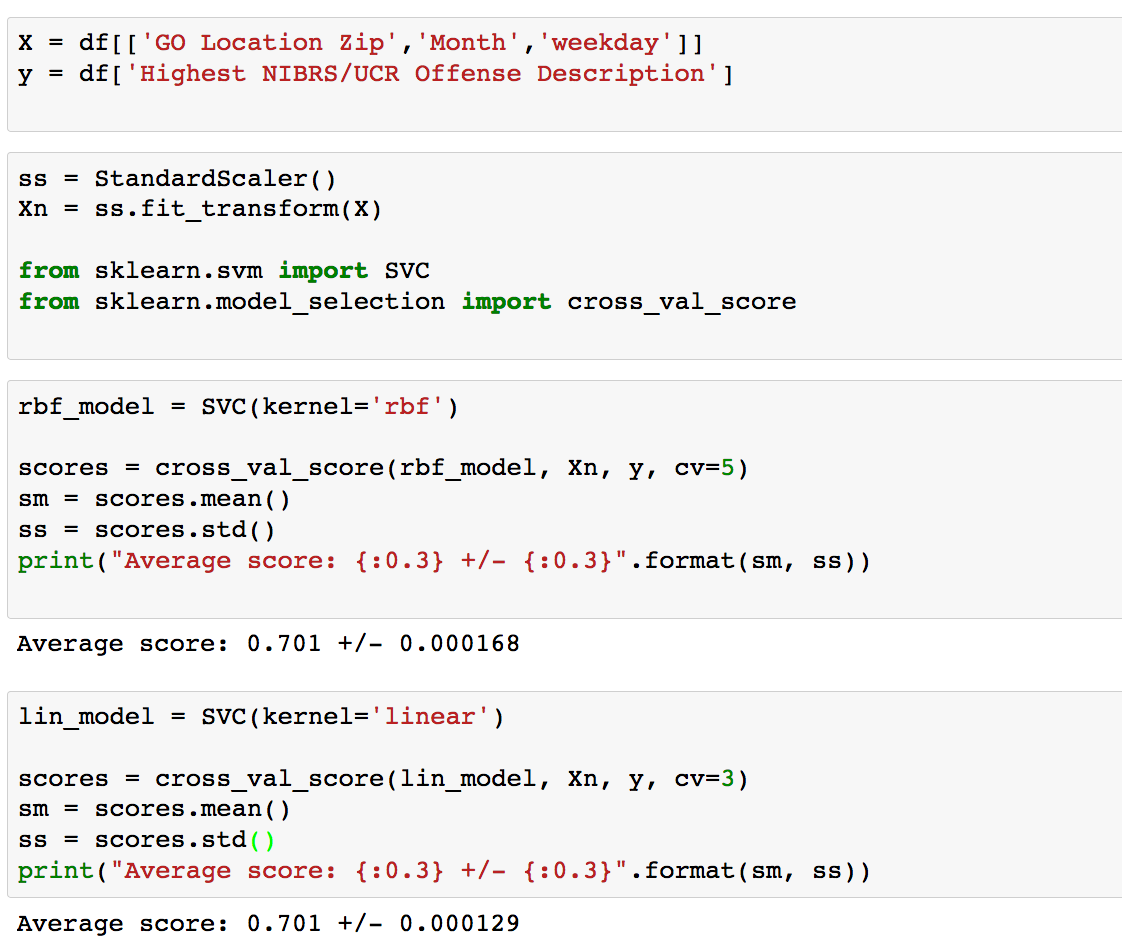

I tried a support vector classifier with the default linear kernel as well as the rbf (Radial Basis Function). 
The rbf essentially creates a smoothed line in comparison to the linear default. Both models performed relatively well with the dataset generated.

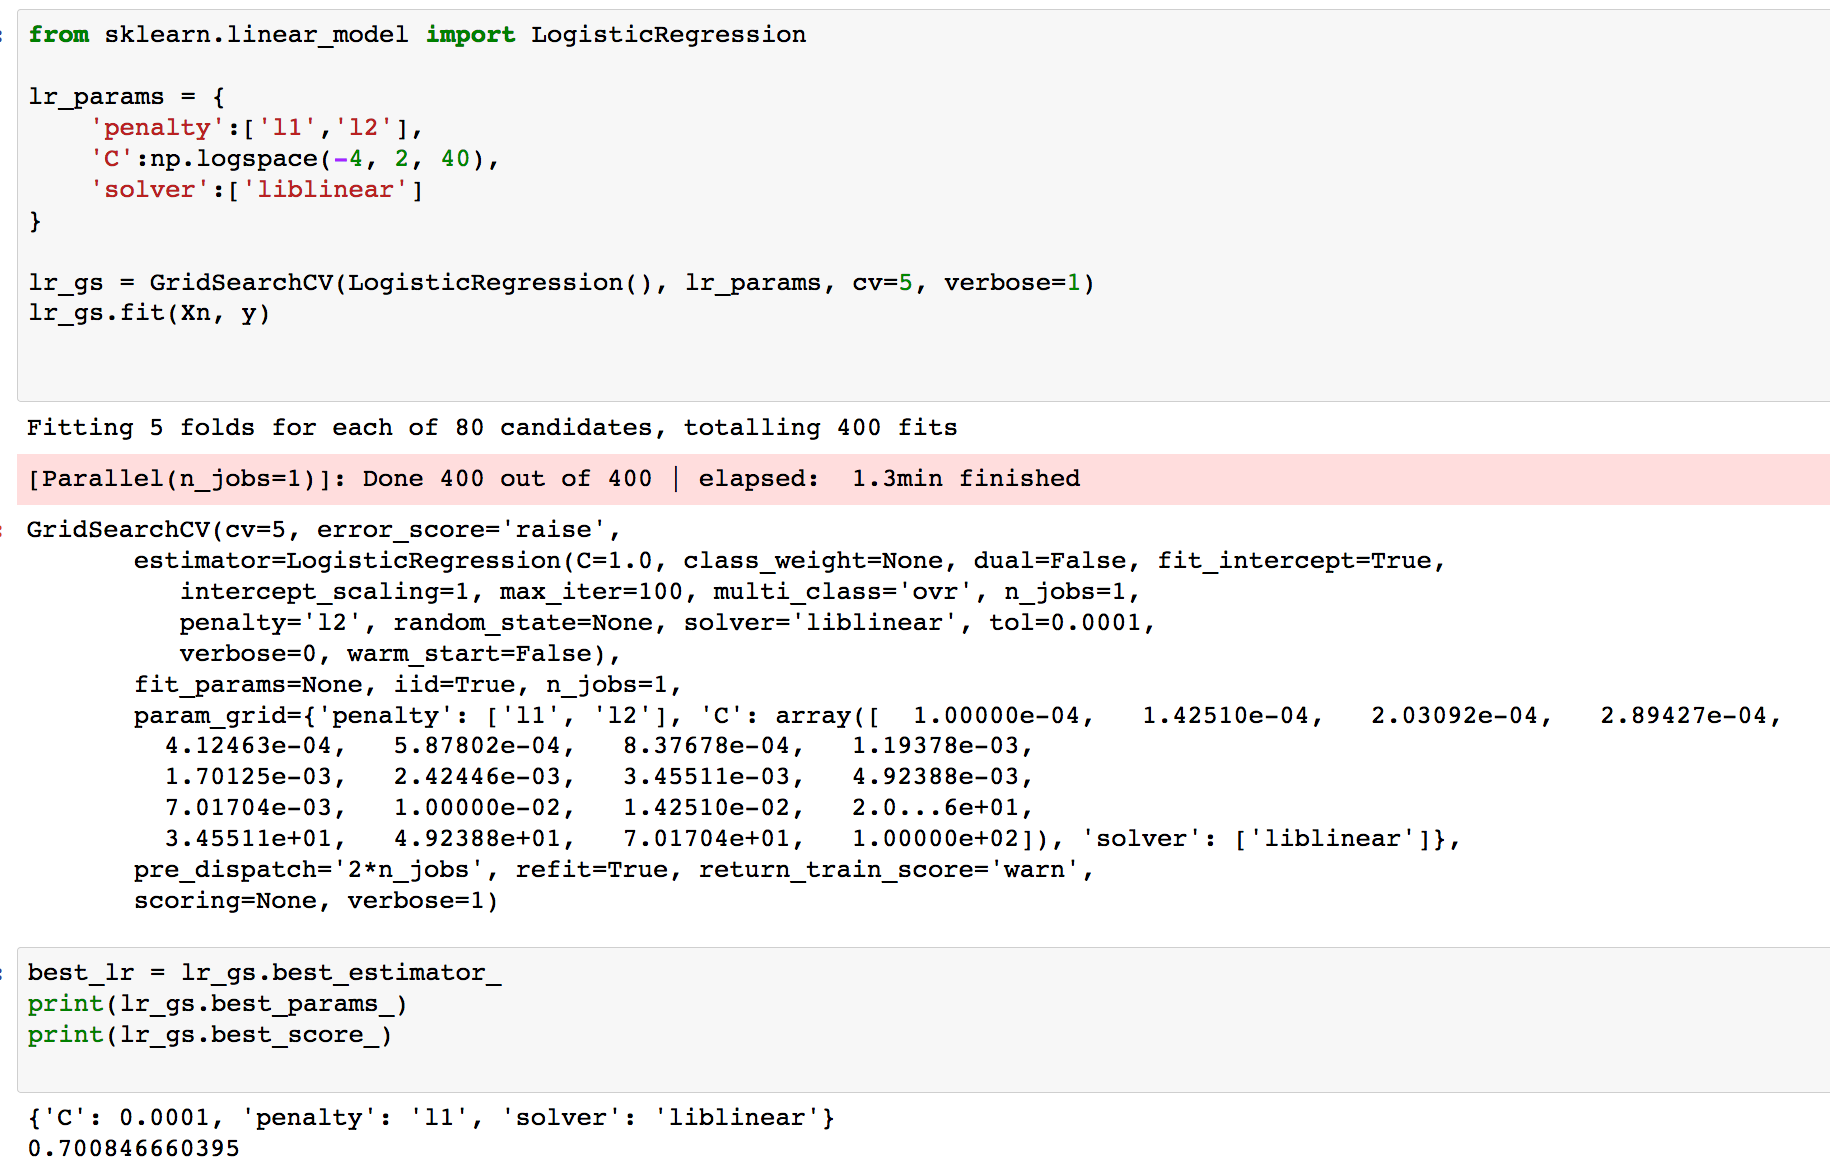

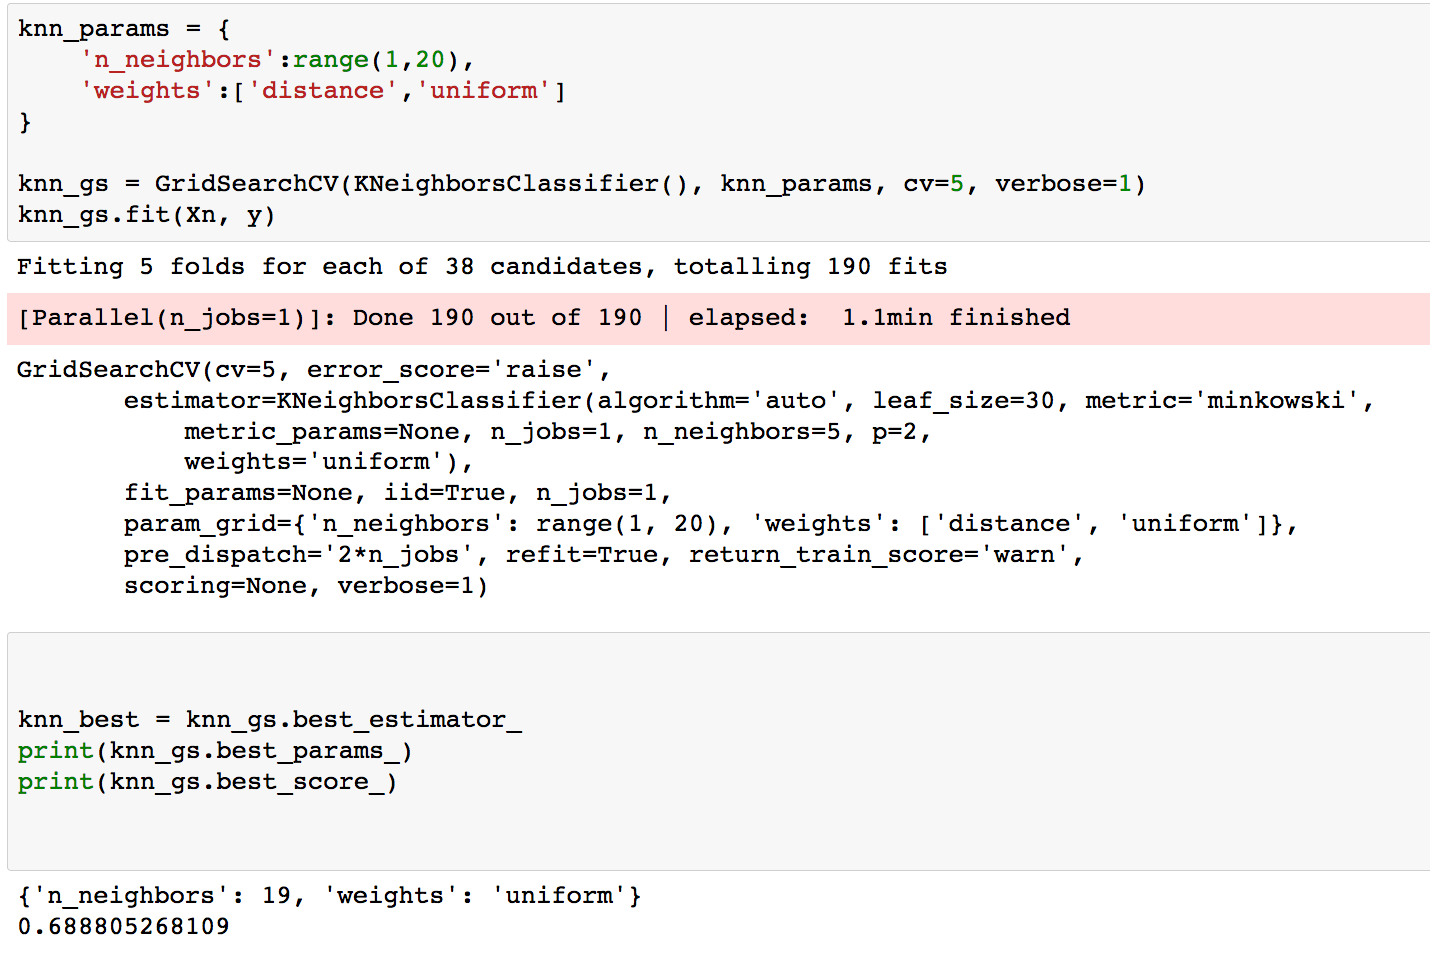

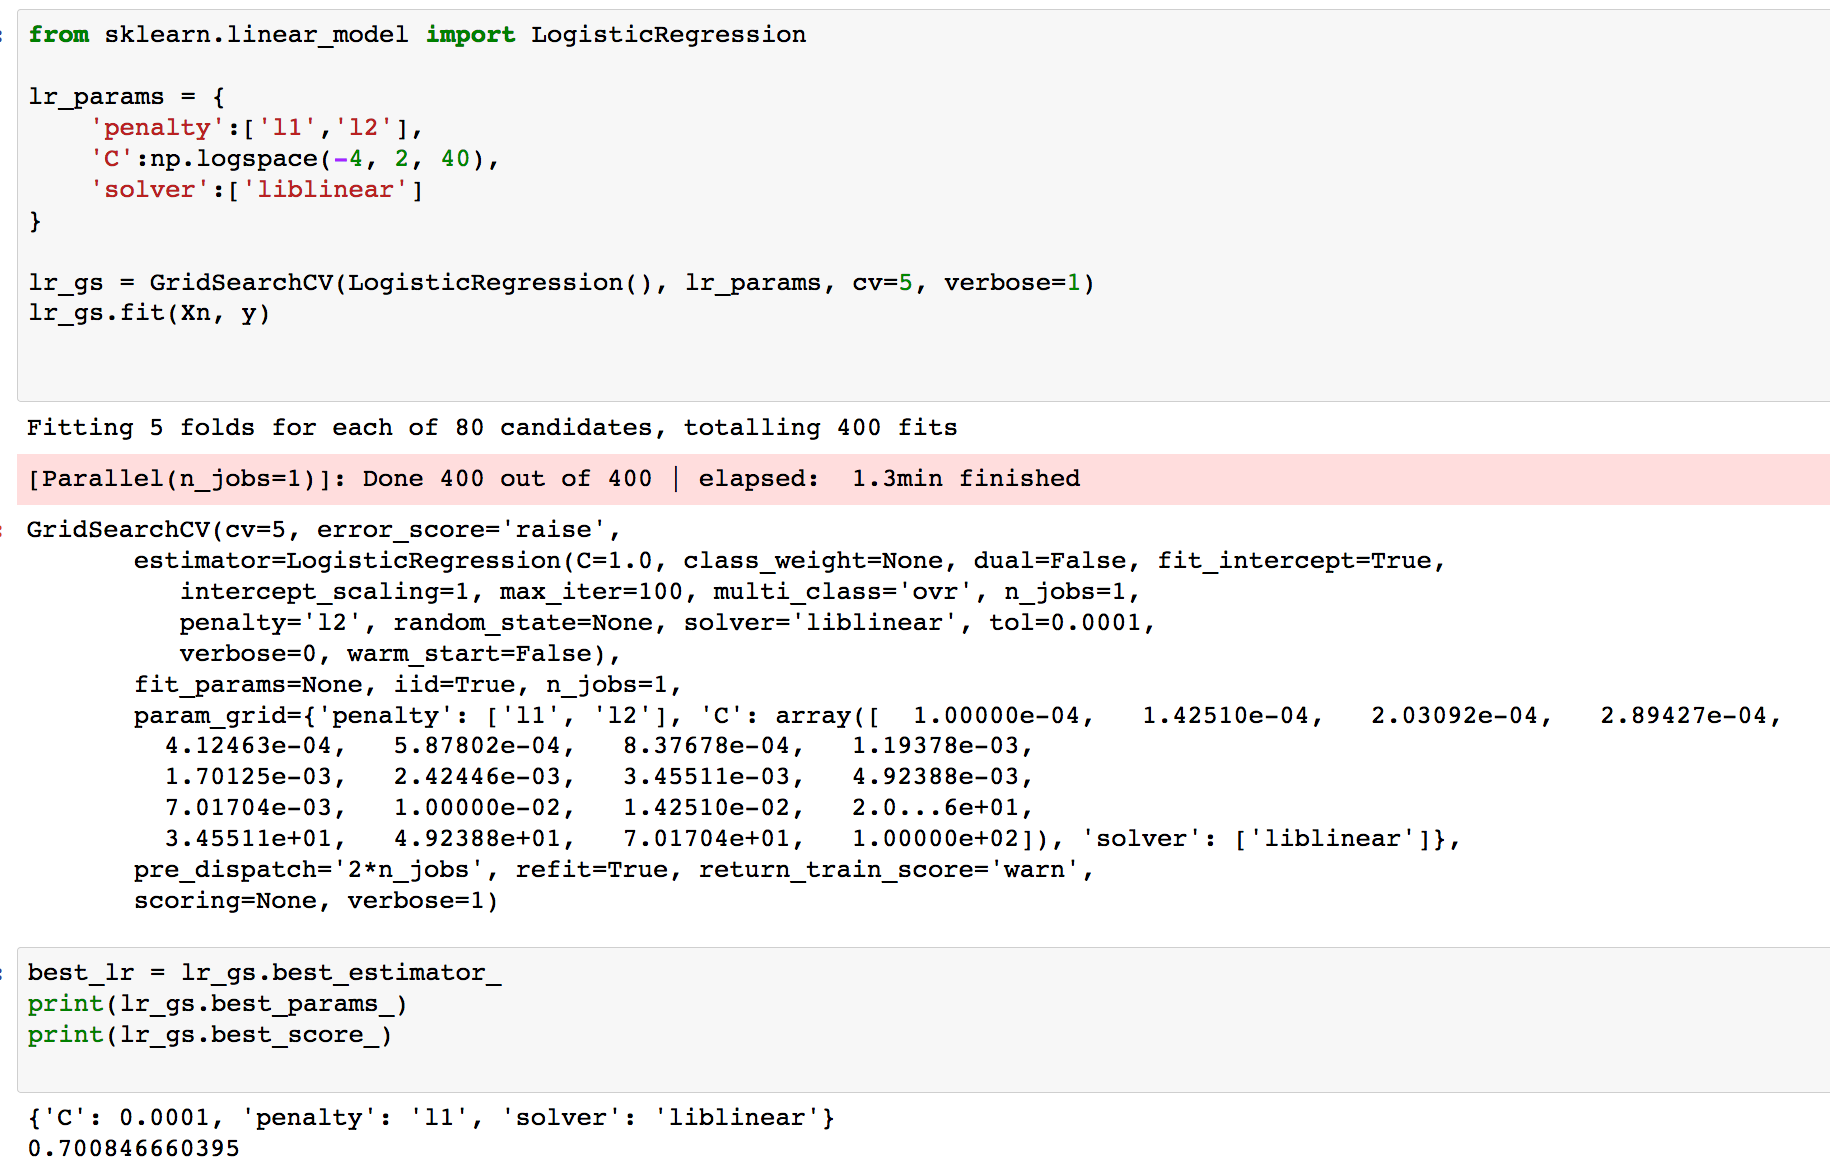

I also attempted a simple Gaussian model in order to do some lazy learning in order to test my predictions

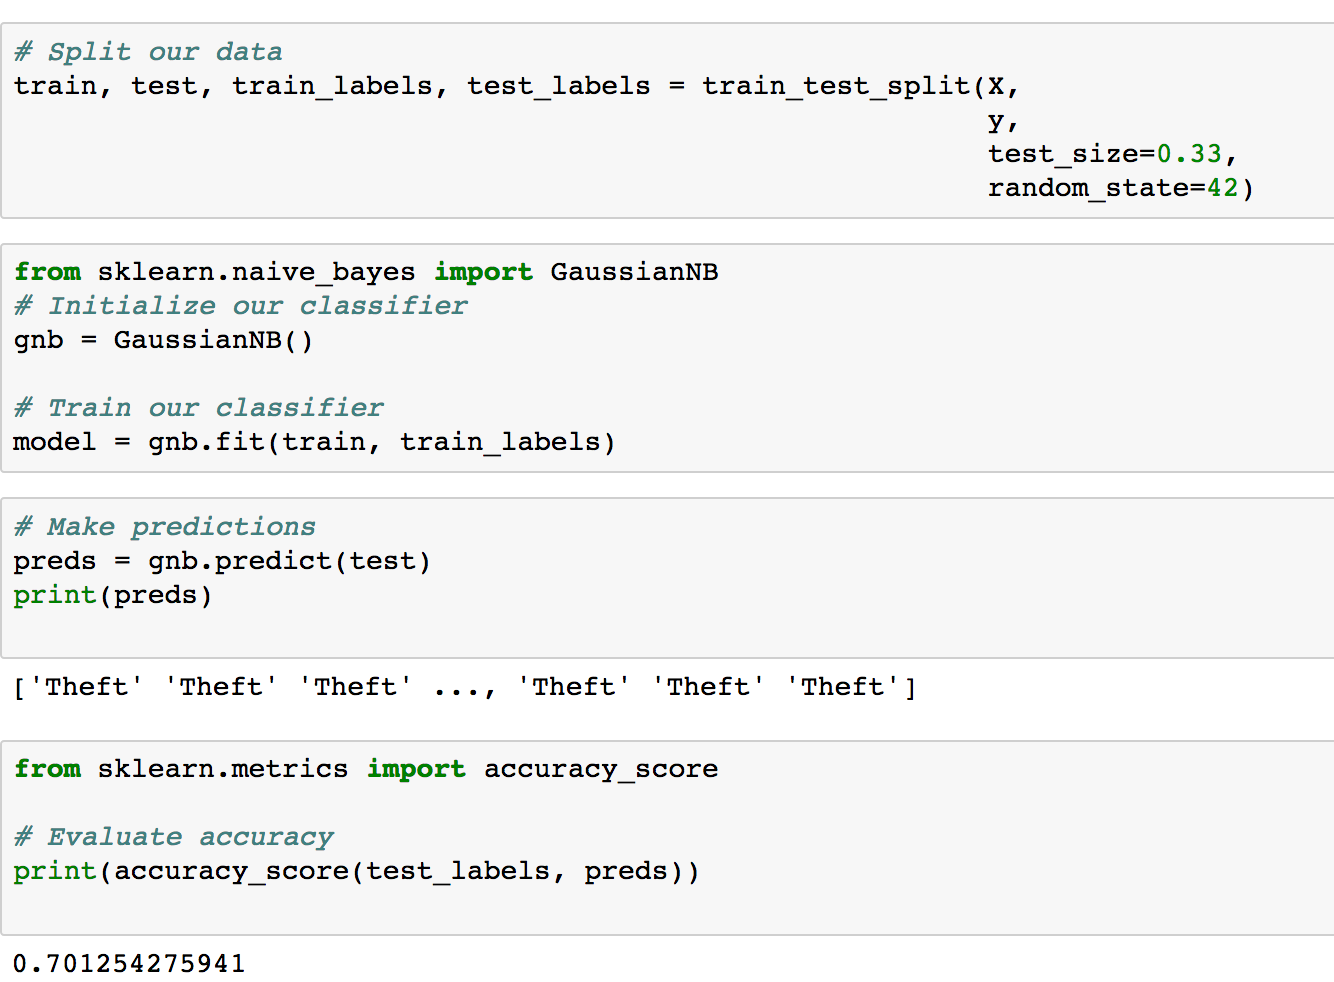

### Finally, to tie the end of my modeling back to one of my motivations for completing the project, I explored the rolling mean and deviation of vehicular crimes in the 78704 area code by aggregating any crimes that occured throughout the year that in some way affected vehicles.

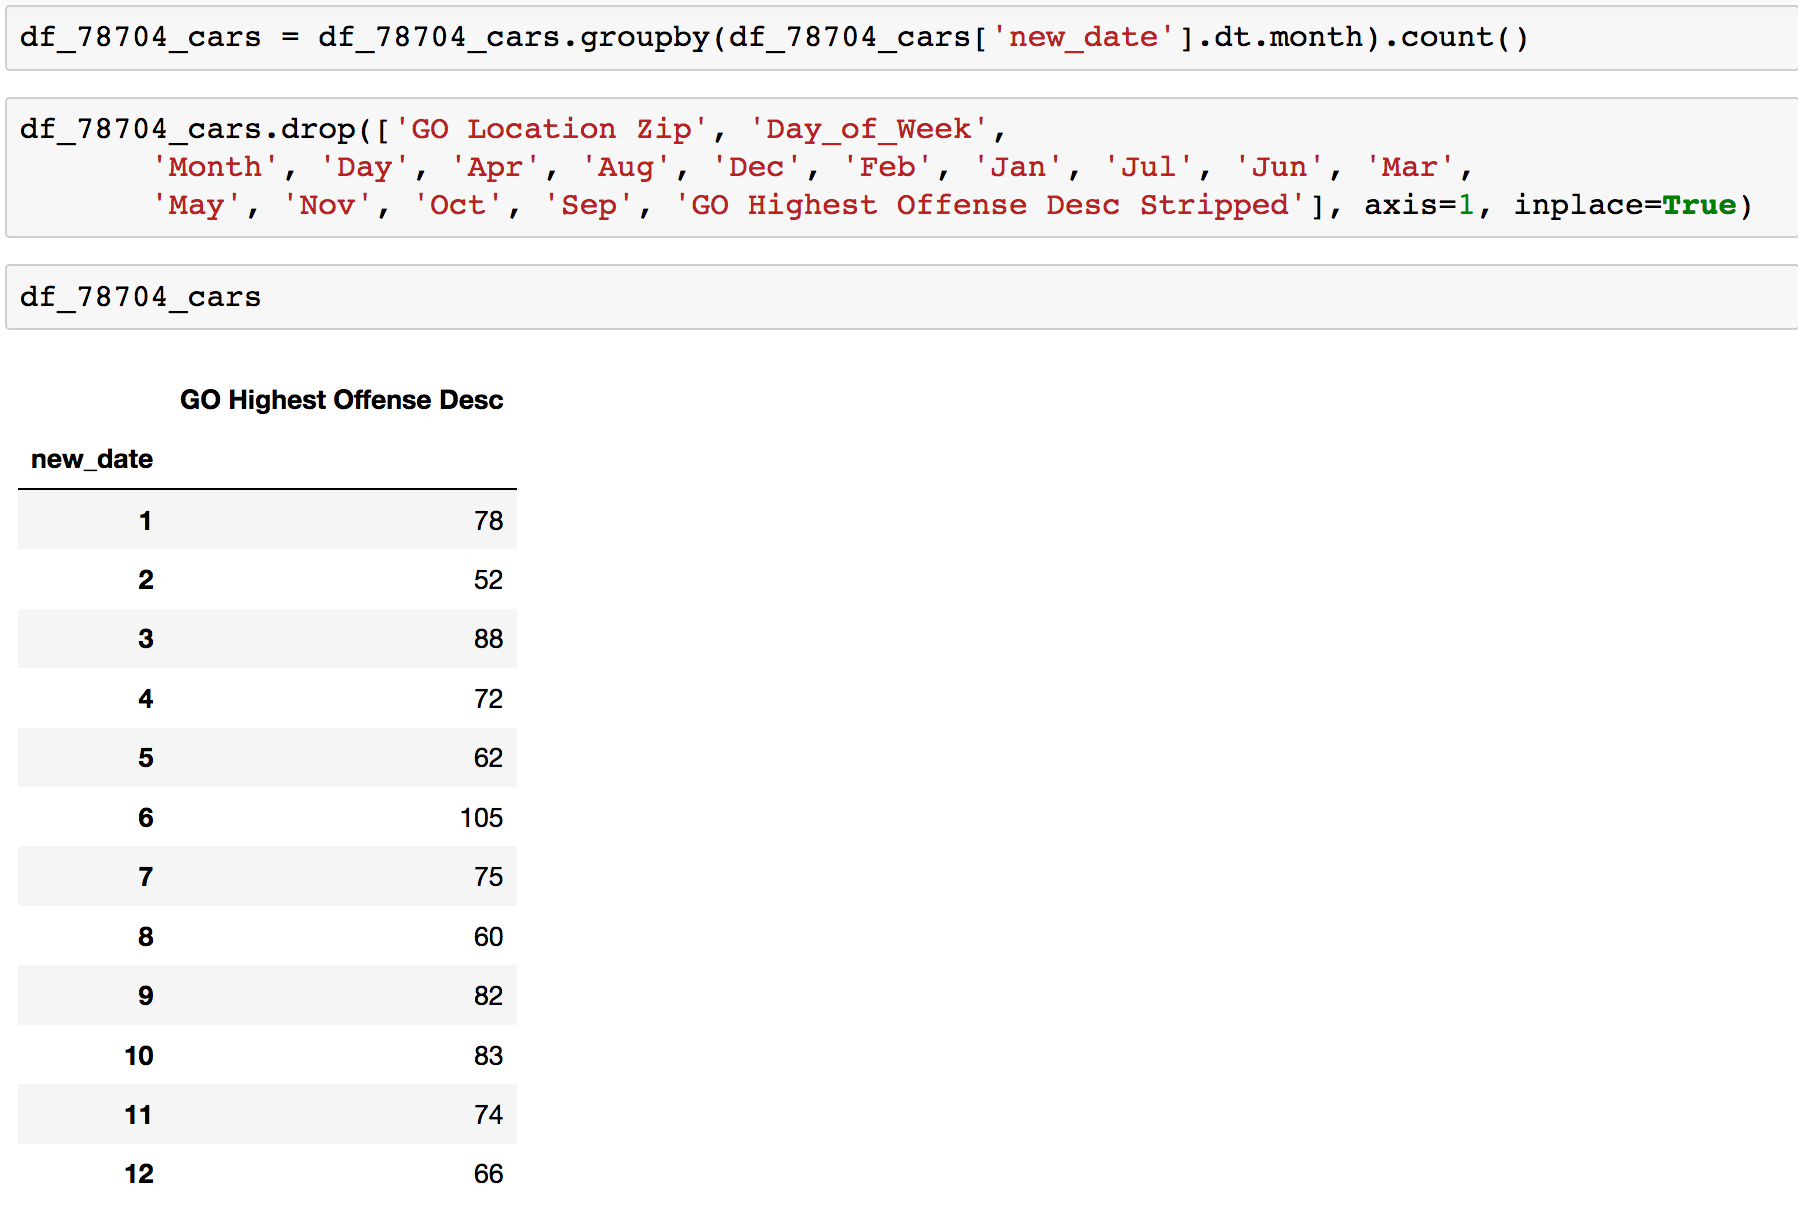

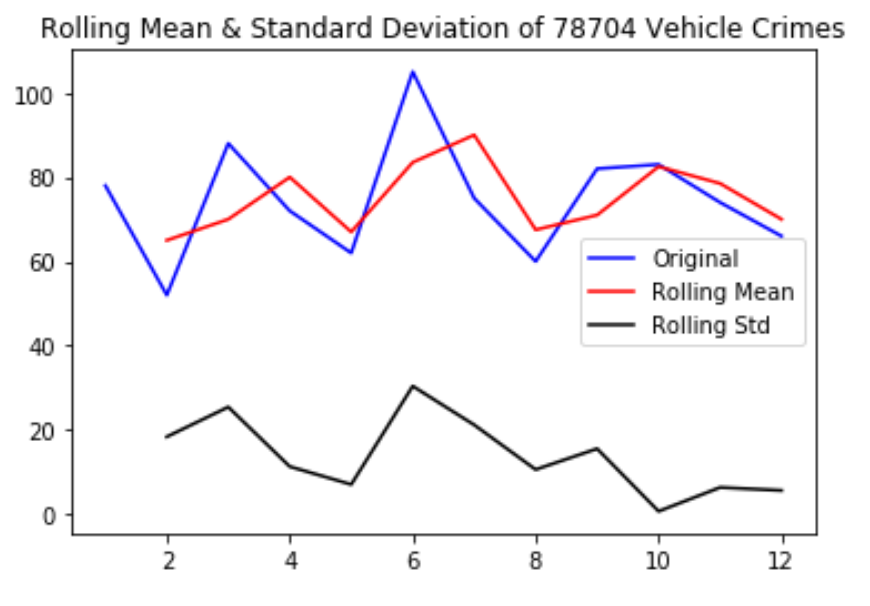

Utilizing a more expansive dataset with multiple years would enable more to more appropriately construct an ARIMA or another time series model.

# Next Steps

There are a few potential next steps for my project:

1) Incorporate a greater timespan of data to more appropriately create rolling crime forecasts 

2) Import weather data into my model to determine if crime is affected by weather patterns

3) Address specific crime occurences in certain zip codes around Austin to create an interactive plot

### Thank you for viewing my project! 
### For any suggestions you may have or to discuss this project in further detail, please email: patrickvaladka@gmail.com